In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
 
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
 
from keras.models import Model
np.random.seed(0)

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


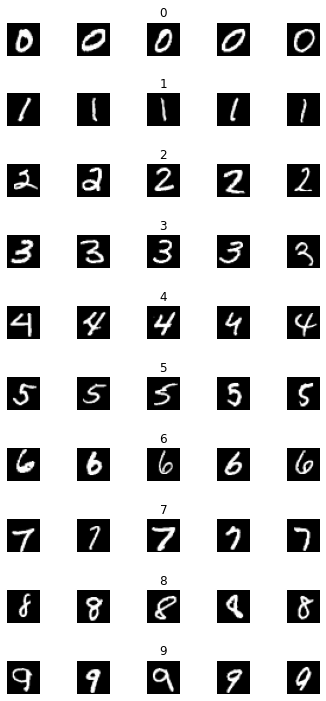

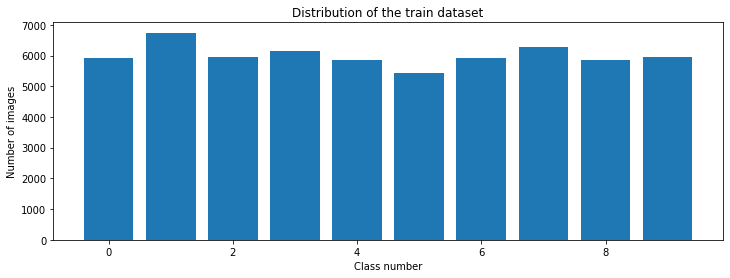

In [3]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255


In [6]:
def leNet_model():
  # create model
  model = Sequential()
  # Here 30 is the number of filters that we will be using
  #(5,5) is the size of filter
  #(28,28,1) is the size of an input image
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu')) 
  #Now we add pooling layer and (2,2) is pooling size
  model.add(MaxPooling2D(pool_size=(2, 2)))
  #Now since we're dealing with a more dense input for this layer we are going to use fewer filters for the purpose of minimizing the required computational power.
  #We are going to use 15 filters on this layer as our image is smaller this time around. We are going to use a smaller filter to extract features whether our filter size is going to be a 3
  model.add(Conv2D(15, (3, 3), activation='relu'))
  #2nd pooling layer
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  #Flatten just flatten our model
  model.add(Flatten())
  #Now our data is ready to be fed into fully connected layer
  #So we first defined the amount of nodes we want to add in the first Hedden layer.
  #We will actually add 500 nodes to this layer.The number can be adjusted as desired.
  model.add(Dense(500, activation='relu'))
  #And finally we are now ready to define the output layer of our network.
  model.add(Dropout(0.5)) #Dropout is used to reduce overfitting.
  #here the num_classes is the number of classes we have in our dataset i.e. 10 (0 to 9)
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model
model = leNet_model()
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)              

Training our CNN

In [7]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 31s 579us/step - loss: 0.2273 - accuracy: 0.9277 - val_loss: 0.0494 - val_accuracy: 0.9852
Epoch 2/10
54000/54000 [==============================] - 31s 567us/step - loss: 0.0655 - accuracy: 0.9792 - val_loss: 0.0415 - val_accuracy: 0.9882
Epoch 3/10
54000/54000 [==============================] - 30s 564us/step - loss: 0.0510 - accuracy: 0.9841 - val_loss: 0.0341 - val_accuracy: 0.9912
Epoch 4/10
54000/54000 [==============================] - 30s 563us/step - loss: 0.0488 - accuracy: 0.9855 - val_loss: 0.0353 - val_accuracy: 0.9885
Epoch 5/10
54000/54000 [==============================] - 30s 561us/step - loss: 0.0421 - accuracy: 0.9870 - val_loss: 0.0348 - val_accuracy: 0.9908
Epoch 6/10
54000/54000 [==============================] - 30s 559us/step - loss: 0.0442 - accuracy: 0.9863 - val_loss: 0.0402 - val_accuracy: 0.9907
Epoch 7/10
54000/54000 [==============================] -

Plotting our Parameters

Text(0.5, 0, 'epoch')

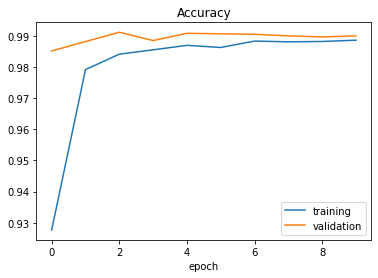

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [26]:
score = model.evaluate(X_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.03726997568316483
Test accuracy: 0.9890000224113464


Prediction

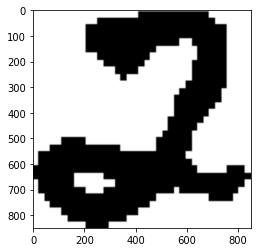

In [23]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
 
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(1, 28, 28, 1)


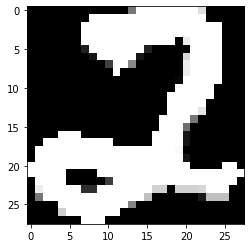

In [24]:
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)

In [25]:
print(img.shape)
print("predicted digit: "+str(model.predict_classes(img)))
 

(1, 28, 28, 1)
predicted digit: [2]


In [0]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

In [28]:
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
 
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


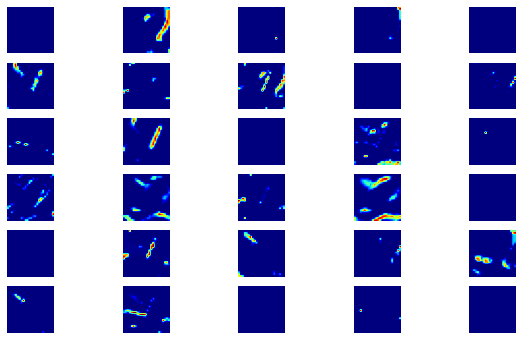

In [29]:
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')
 


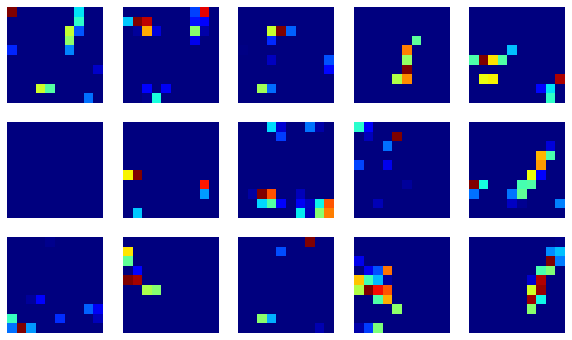

In [30]:
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')